Question 2 "Years v Movie rating quantity + Movie rating avg" (bar graph) [Comparing movies relesased in the last 10 years] 
"Kaggle + DB"

In [14]:
import requests
import json
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from json import loads
from pprint import pprint


In [ ]:
#baseData = pd.read_csv('../Data/cleaned_moviesDF1.csv', index_col=False)
#len(baseData)

In [ ]:
#baseData.head()

In [ ]:
#baseData = baseData.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
'''
baseData['Correct ID'] = ""
baseData['Vote Average'] = ""
baseData['Vote Count'] = ""
baseData['Genre'] = ""
baseData['Movie Budget'] = ""
baseData['Movie Revenue'] = ""
baseData['Original Language'] = ""

baseData.head()'''

In [ ]:
#test = 238
#test

In [ ]:
#endpointURL = f"https://api.themoviedb.org/3/movie/{test}?api_key={api}"
#data = requests.get(endpointURL).json()
#pprint(data)

In [ ]:
# voteAverage = data['vote_average']
# voteCount = data['vote_count']

#movieReleaseDate = data['genres'][0]['name']
#movieReleaseDate

In [ ]:
'''
movie_title = 'The Godfather'
year = '1972'
queryURL = f"https://api.themoviedb.org/3/search/movie?api_key={api}&query={movie_title}&year={year}"
queryRequest = requests.get(queryURL).json()
pprint(queryRequest)'''

In [ ]:
'''movie_title = '#cats_the_mewvie'
year = '2020'
queryURL = f"https://api.themoviedb.org/3/search/movie?api_key={api}&query={movie_title}&year={year}"
queryRequest = requests.get(queryURL).json()

try:
    for results in queryRequest['results']:
        print(results)
except:
    print("Not Found")
    
    
#pprint(queryRequest)'''

In [ ]:
#for results in queryRequest:
#    print(results)

In [ ]:
'''movie = 'The Irishman'
for results in queryRequest['results']:
    print(results['original_title'])
    if results['original_title'] == movie:
        print(results['id'])
    else:
        print("false")'''

In [ ]:
# For loop to make API call to pull in baseData['vote_average'] for each movie
# Check if year matches what is pulled from API, drop if no match
# If vote_average = 0, make null. Then drop null(?)
# Export final data to csv
# Clean baseData to group by year (buckets of 2-3 years): count of values by that year, average of ratings for that year
# Idea: baseData['runtime'], average runtime per year, does runtime affect average rating? Do longer movies have better ratings or worse?


In [ ]:
'''voteAverge = []
voteCount = []
cleanBaseData = baseData
movieList = []
moviesNotFound = []

print("-------------------------------------------")
print("Data Process Starting...")
print("-------------------------------------------")
# Loop through each movie in Kaggle list to find data correct movie ID and movie data if ID is found
for index, movie in cleanBaseData.iterrows():
    currentMovie = movie['Title']
    currentMovieYear =  movie['Year']
    currentMovieID = ''
    
    queryURL = f"https://api.themoviedb.org/3/search/movie?api_key={api}&query={currentMovie}&year={currentMovieYear}"
    queryRequest = requests.get(queryURL).json()
    
    # Try-except to catch KeyError from movies that return zero results
    print(f"Searching for {index}: {currentMovie}")
    try: 
        # Loop through each result from query
        for results in queryRequest['results']:
            # If to identify if the title matches Kaggle title
            if results['title'] == currentMovie:
                currentMovieID = results['id']
                print(f"Movie {index}: {currentMovie} found in query")
                break
            # Skip to next result in query if title does not match
            else:
                print(f"Incorrect Movie From Query: {results['title']} --------------")
                continue
    except:
        # Fill in table with null values for the movie if query has no results
        print(f"No results for {currentMovie}. Skipping...")
        moviesNotFound.append(currentMovie)
        cleanBaseData.loc[index, 'Correct ID'] = np.NaN
        cleanBaseData.loc[index, 'Vote Average'] = np.NaN
        cleanBaseData.loc[index, 'Vote Count'] = np.NaN
        cleanBaseData.loc[index, 'Genre'] = np.NaN
        cleanBaseData.loc[index, 'Movie Budget'] = np.NaN
        cleanBaseData.loc[index, 'Movie Revenue'] = np.NaN
        cleanBaseData.loc[index, 'Original Language'] = np.NaN
        continue
    
    # Checks if currentMovieID variable is empty. Empty variable would mean no movie ID was found
    if currentMovieID == '':
        print(f"Movie ID for {currentMovie} was not found in query --------------")
        moviesNotFound.append(currentMovie)
        continue
    # If currentMovieID contains ID, pull data from API
    else:
        try:
            print(f"Pulling data for {currentMovie}: {currentMovieID}")
            movieURL = f"https://api.themoviedb.org/3/movie/{currentMovieID}?api_key={api}"
            movieRequest = requests.get(movieURL).json()
            movieList.append(movieRequest['title'])
            cleanBaseData.loc[index, 'Correct ID'] = currentMovieID
            cleanBaseData.loc[index, 'Vote Average'] = movieRequest['vote_average']
            cleanBaseData.loc[index, 'Vote Count'] = movieRequest['vote_count']
            cleanBaseData.loc[index, 'Genre'] = movieRequest['genres'][0]['name']
            cleanBaseData.loc[index, 'Movie Budget'] = movieRequest['budget']
            cleanBaseData.loc[index, 'Movie Revenue'] = movieRequest['revenue']
            cleanBaseData.loc[index, 'Original Language'] = movieRequest['original_language']
            print(f"Data for {currentMovie} is complete.")
        except:
            print("Movie data could not be found --------------")
            cleanBaseData.loc[index, 'Correct ID'] = np.NaN
            cleanBaseData.loc[index, 'Vote Average'] = np.NaN
            cleanBaseData.loc[index, 'Vote Count'] = np.NaN
            cleanBaseData.loc[index, 'Genre'] = np.NaN
            cleanBaseData.loc[index, 'Movie Budget'] = np.NaN
            cleanBaseData.loc[index, 'Movie Revenue'] = np.NaN
            cleanBaseData.loc[index, 'Original Language'] = np.NaN
            
    print("-------------------------------------------")
            
print("-------------------------------------------")
print("Data Processing Complete")
print("-------------------------------------------")'''

In [ ]:
'''output = "test.csv"
cleanBaseData.to_csv(output, encoding='utf-8')'''

In [ ]:
#cleanBaseData.head()

In [ ]:
#moviesNotFound

In [19]:
movieData = pd.read_csv('../Data/KaggleWithTMDBData.csv', index_col=False)
movieData = movieData.drop(columns=['Unnamed: 0']) # 2694
movieData = movieData.dropna()

len(movieData)

2624

In [20]:
movieData.head()

,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,TMDB ID,Correct ID,Vote Average,Vote Count,Genre,Movie Budget,Movie Revenue,Original Language
0,1,The Irishman,2019,18+,98/100,1,0,0,0,0,255839,398978.0,7.637,5489.0,Crime,159000000.0,968853.0,en
1,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0,664280,664280.0,8.545,231.0,Documentary,0.0,0.0,en
2,5,Roma,2018,18+,94/100,1,0,0,0,0,11035,426426.0,7.678,3431.0,Drama,15000000.0,1140769.0,es
3,6,To All the Boys I've Loved Before,2018,13+,94/100,1,0,0,0,0,466282,466282.0,7.690,7636.0,Comedy,0.0,0.0,en
4,7,The Social Dilemma,2020,13+,93/100,1,0,0,0,0,656690,656690.0,7.508,1249.0,Documentary,0.0,0.0,en


In [21]:
for index, movie in movieData.iterrows():
    if movie['Vote Average'] <= 0:
        movieData.drop(axis='index', index=index, inplace=True)
len(movieData)

2579

In [22]:
voteStats = movieData.groupby(['Year']).agg(['count', 'mean'])[['Vote Average', 'Vote Count']]
voteStats

C:\Users\ASKOR\AppData\Local\Temp\ipykernel_9704\888062028.py:1: FutureWarning: ['Title', 'Age', 'Rotten Tomatoes', 'Genre', 'Original Language'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  voteStats = movieData.groupby(['Year']).agg(['count', 'mean'])[['Vote Average', 'Vote Count']]


Vote Average           Vote Count             
            count      mean      count         mean
Year                                               
2012          173  6.093642        173  1183.699422
2013          161  6.165255        161  1286.161491
2014          188  6.178463        188  1017.601064
2015          185  6.196865        185   903.740541
2016          269  6.237145        269  1085.249071
2017          345  6.228432        345   743.463768
2018          370  6.342703        370   723.972973
2019          393  6.415163        393   706.541985
2020          367  6.545406        367   427.057221
2021          128  6.771914        128   512.734375

In [7]:
# voteStats['Vote Average'] # Shows count and average of Vote Average
# voteStats['Vote Average']['count'] # Shows only count of Vote Average
# voteStats['Vote Average']['count'][2012] # Shows count of Vote Average for year 2012

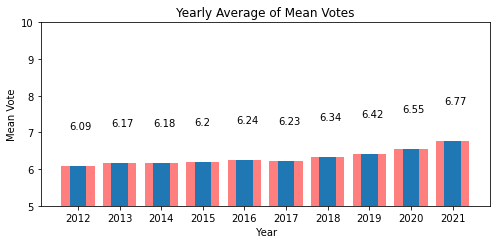

In [127]:
x_axis = voteStats.index
Y_axis = voteStats['Vote Average']['mean']
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019","2020","2021"])

plt.bar(x_axis,Y_axis , color='r', alpha=0.5, align="center")
plt.ylim(5, 10)
plt.title("Yearly Average of Mean Votes")
plt.xlabel(" Year")
plt.ylabel("Mean Vote")
# assign your bars to a variable so their attributes can be accessed
bars = plt.bar(x_axis, height=Y_axis, width=.4)

# access the bar attributes to place the text in the appropriate location
for bar in bars:
    yval = round (bar.get_height(), 2)
    plt.text(bar.get_x(), yval + 1, yval)
plt.show()

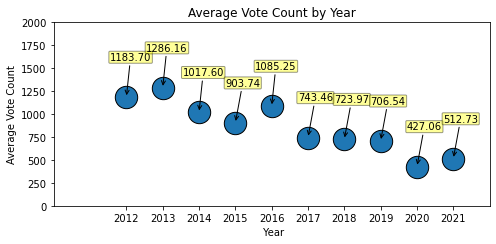

In [126]:

value_scatter = voteStats['Vote Count']['mean']
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
#xpoints = np.linspace(1, 10, 25)
#ypoints = np.random.rand(25)
labels = ["%.2f" % i for i in value_scatter]
plt.scatter(x_axis, value_scatter,marker="o", edgecolors="black",
            s=500, alpha=1)

for label, x, y in zip(labels, x_axis, value_scatter):
   plt.annotate(
      label,
      xy=(x, y), xytext=(25, 35),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.1', fc='yellow', alpha=.4),
      arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0')
   )
plt.xticks(tick_locations, ["2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019","2020","2021"])
plt.title('Average Vote Count by Year')
plt.xlabel(' Year')
plt.ylabel('Average Vote Count')
plt.xlim(2010,2022)
plt.ylim(0,2000)
plt.show()